# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [6]:

# To display summary statistics
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


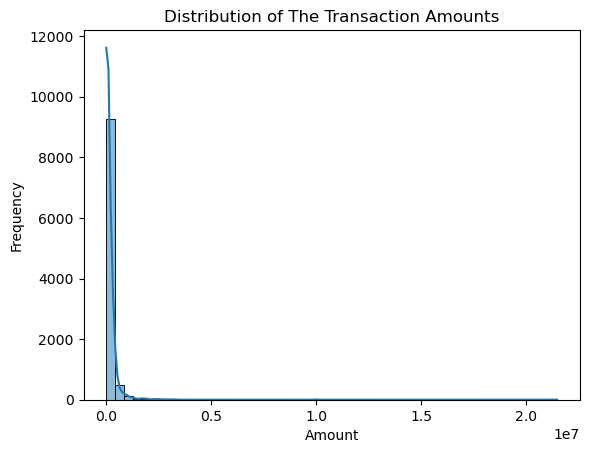

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# TODO: Begin your EDA

# To Visualize distribution of transaction amounts 
sns.histplot(transactions['amount'].sample(10000), bins=50, kde=True)
plt.title('Distribution of The Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# To check for missing values
transactions.isnull().sum()

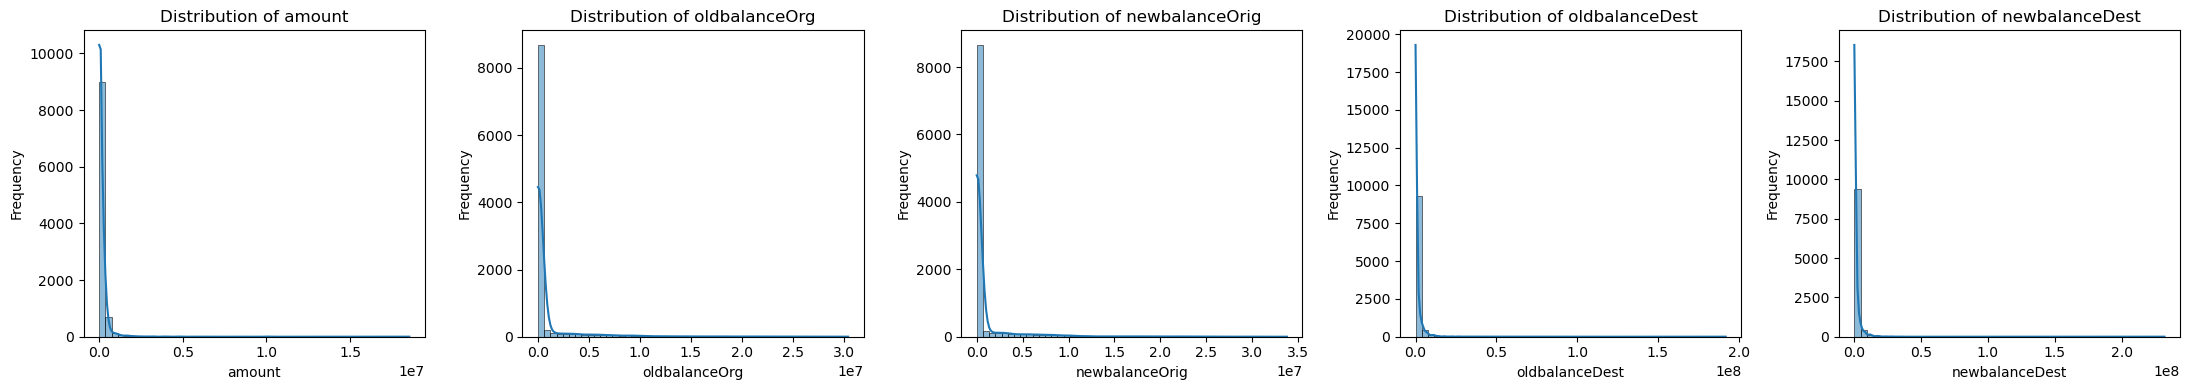

In [ ]:
# To visualize distributions of key numeric features
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(22, 4))
for i, feature in enumerate(numeric_features):
    sns.histplot(transactions[feature].sample(10000), bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

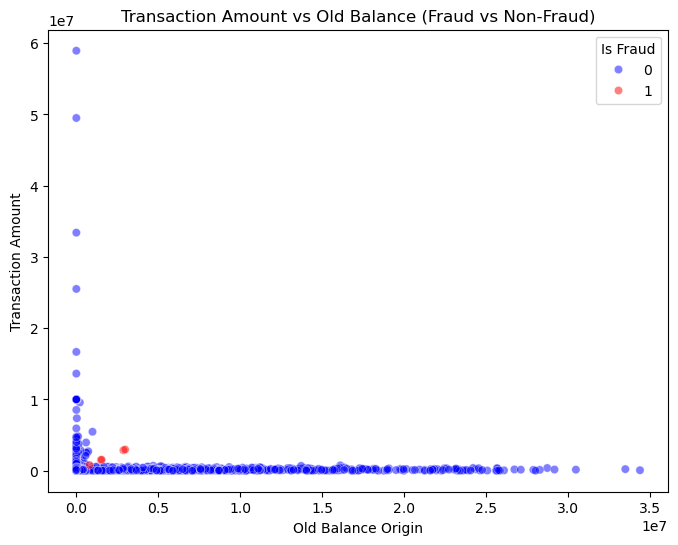

In [ ]:
# To Compare two numeric features: 'amount' vs 'oldbalanceOrg', colored by fraud status
sample_df = transactions.sample(10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=sample_df,
    x='oldbalanceOrg',
    y='amount',
    hue='isFraud',
    palette={0: 'blue', 1: 'red'},
    alpha=0.5
)
plt.title('Transaction Amount vs Old Balance (Fraud vs Non-Fraud)')
plt.xlabel('Old Balance Origin')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()


             count           mean           std   min         25%         50%  \
type                                                                            
CASH_IN   219955.0  168928.914668  1.267864e+05  0.43   70092.845  142942.990   
CASH_OUT  351360.0  175584.659320  1.703743e+05  0.00   72382.815  146209.915   
DEBIT       6417.0    5445.890813  1.302416e+04  5.24    1530.240    3099.530   
PAYMENT   338573.0   13055.592085  1.256291e+04  0.03    4377.100    9481.670   
TRANSFER   83695.0  911827.155179  1.896175e+06  2.60  217105.800  487883.710   

                  75%          max  
type                                
CASH_IN   240085.0800   1609288.13  
CASH_OUT  245881.7625  10000000.00  
DEBIT       5423.2500    389762.68  
PAYMENT    17565.5600    230549.18  
TRANSFER  978027.6650  92445516.64  


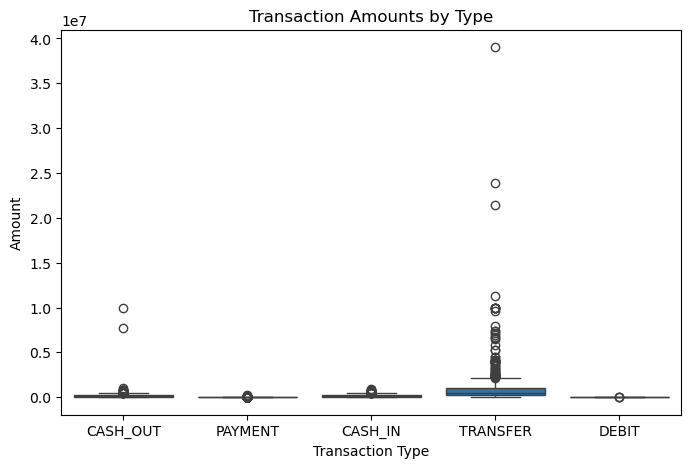

In [12]:
# To Group by transaction type and show summary statistics for amount
type_amount_stats = transactions.groupby('type')['amount'].describe()
print(type_amount_stats)

# To visualize typical transaction amounts by type
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='amount', data=transactions.sample(10000))
plt.title('Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

isFraud               0             1
type                                 
CASH_IN   168928.914668           NaN
CASH_OUT  173427.674988  1.326971e+06
DEBIT       5445.890813           NaN
PAYMENT    13055.592085           NaN
TRANSFER  908187.358989  1.384176e+06


<Figure size 800x500 with 0 Axes>

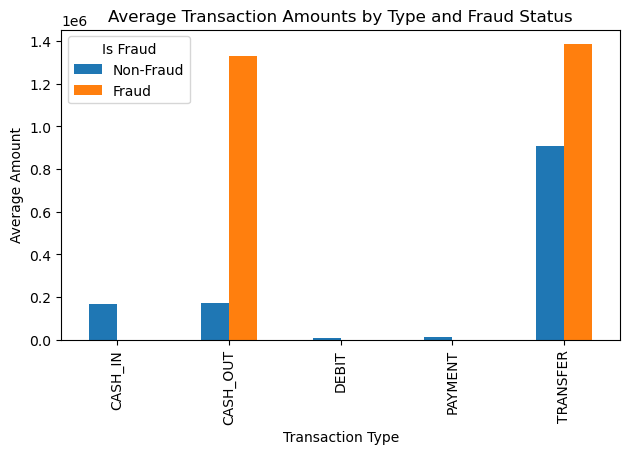

In [13]:
#To summarize average transaction amounts by both fraud label and transaction type
fraud_type_amount = transactions.groupby(['type', 'isFraud'])['amount'].mean().unstack()

print(fraud_type_amount)

# To visualize the comparison
plt.figure(figsize=(8, 5))
fraud_type_amount.plot(kind='bar', stacked=False)
plt.title('Average Transaction Amounts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.legend(['Non-Fraud', 'Fraud'], title='Is Fraud')
plt.tight_layout()
plt.show()

In [ ]:
# To analyze alignment between isFlaggedFraud and isFraud
flag_fraud_summary = transactions.groupby(['isFraud', 'isFlaggedFraud']).size().unstack(fill_value=0)
print(flag_fraud_summary)

# To Calculate rates for flagged fraud detection
total_fraud = transactions['isFraud'].sum()
flagged_fraud = flag_fraud_summary.loc[1, 1] if 1 in flag_fraud_summary.index else 0
unflagged_fraud = flag_fraud_summary.loc[1, 0] if 1 in flag_fraud_summary.index else 0

print(f"Total fraudulent transactions: {total_fraud}")
print(f"Flagged fraudulent transactions: {flagged_fraud}")
print(f"Unflagged fraudulent transactions: {unflagged_fraud}")
print(f"Flagged fraud detection rate: {flagged_fraud / total_fraud:.2%}" if total_fraud > 0 else "No fraud detected.")

isFlaggedFraud       0  1
isFraud                  
0               998703  0
1                 1296  1
Total fraudulent transactions: 1297
Flagged fraudulent transactions: 1
Unflagged fraudulent transactions: 1296
Flagged fraud detection rate: 0.08%


In [ ]:
# Q5: To analyze alignment between isFlaggedFraud and isFraud

# To display the summary table again for reference
print("Fraud Flag vs Actual Fraud Summary:")
print(flag_fraud_summary)

# To calculate key metrics
total_transactions = transactions.shape[0]
total_fraud = transactions['isFraud'].sum()
flagged_fraud = flag_fraud_summary.loc[1, 1] if 1 in flag_fraud_summary.index else 0
unflagged_fraud = flag_fraud_summary.loc[1, 0] if 1 in flag_fraud_summary.index else 0
total_flagged = transactions['isFlaggedFraud'].sum()

# To print performance metrics
print(f"\nTotal transactions: {total_transactions}")
print(f"Total fraudulent transactions: {total_fraud}")
print(f"Flagged fraudulent transactions: {flagged_fraud}")
print(f"Unflagged fraudulent transactions: {unflagged_fraud}")
print(f"Total flagged transactions: {total_flagged}")
print(f"Flagged fraud detection rate: {flagged_fraud / total_fraud:.2%}" if total_fraud > 0 else "No fraud detected.")
print(f"False positive rate (flagged but not fraud): {(flag_fraud_summary.loc[0, 1] / total_flagged):.2%}" if total_flagged > 0 else "No flagged transactions.")
print(f"False negative rate (fraud but not flagged): {(unflagged_fraud / total_fraud):.2%}" if total_fraud > 0 else "No fraud detected.")

Fraud Flag vs Actual Fraud Summary:
isFlaggedFraud       0  1
isFraud                  
0               998703  0
1                 1296  1

Total transactions: 1000000
Total fraudulent transactions: 1297
Flagged fraudulent transactions: 1
Unflagged fraudulent transactions: 1296
Total flagged transactions: 1
Flagged fraud detection rate: 0.08%
False positive rate (flagged but not fraud): 0.00%
False negative rate (fraud but not flagged): 99.92%


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here: The majority of transactions involve relatively small amounts, while a small number of transactions have extremely large values. This is evident in the histograms above, where most data points cluster near the lower end of each axis, and long tails extend toward higher values. Such distributions suggest that typical transactions are modest, but there are rare, high-value transactions that could be outliers or potentially suspicious. This pattern is common in financial data and highlights the importance of focusing on those rare, large transactions during fraud detection and further analysis.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here: Fraudulent transactions tend to cluster in specific regions when comparing numeric features. In the scatterplot of `oldbalanceOrg` vs `amount`, most fraudulent transactions (red points) are concentrated where the origin balance is low or zero, but the transaction amount is relatively high. This suggests that fraud often occurs when large amounts are moved from accounts with little or no prior balance. Non-fraudulent transactions (blue points) are more widely distributed across the feature space. These patterns indicate that fraud is associated with unusual combinations of balances and amounts, which can help in identifying suspicious activity.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Answer here: Based on the summary statistics above, TRANSFER transactions have the highest average and maximum amounts, with a mean of over 900,000 and a maximum exceeding 92 million. CASH_OUT and CASH_IN transactions also involve large amounts, but their averages are lower than TRANSFER. PAYMENT and DEBIT transactions consistently involve much smaller amounts, with means around 13,000 and 5,400 respectively. This indicates that some transaction types (TRANSFER, CASH_OUT, CASH_IN) are typically larger, while PAYMENT and DEBIT are smaller.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here:  Observations:For most transaction types (CASH_IN, DEBIT, PAYMENT), there are no fraudulent transactions (NaN in '1' column).For CASH_OUT and TRANSFER, fraudulent transactions have much higher average amounts than non-fraudulent ones.
CASH_OUT: Non-Fraud ~173,428; Fraud ~1,326,971
TRANSFER: Non-Fraud ~908,187; Fraud ~1,384,176
This suggests fraud is concentrated in specific transaction types and involves larger amounts.


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here: The system's built-in fraud flag (`isFlaggedFraud`) rarely aligns with actual fraudulent activity. Out of 1,297 fraudulent transactions, only 1 was flagged, resulting in a detection rate of just 0.08%. Almost all fraud goes unflagged (99.92% false negative rate), and there are virtually no false positives. This indicates the current flagging system is extremely conservative and misses nearly all fraud, suggesting a need for significant improvement in fraud detection logic.